In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
%matplotlib inline

In [3]:
x = pd.read_excel('LRFSOPQTY.xlsx')

In [4]:
x.head()

,Year,Oil Price,Total Sales,Qty MC205
0,2016-01-01,29.78,1380587.63,26
1,2016-02-01,31.03,970876.71,30
2,2016-03-03,37.34,867645.65,62
3,2016-04-03,40.75,449015.42,6
4,2016-05-04,45.94,478956.43,126


In [5]:
x.describe()

,Oil Price,Total Sales,Qty MC205
count,30.000000,3.000000e+01,30.000000
mean,51.917000,3.302241e+06,79.100000
std,10.954843,3.679282e+06,77.578592
min,29.780000,4.490154e+05,2.000000
25%,45.430000,8.934534e+05,26.750000
50%,50.420000,1.503081e+06,40.500000
75%,58.677500,4.216898e+06,123.500000
max,74.030000,1.300366e+07,254.000000


In [6]:
x.set_index('Year',inplace = True)

In [7]:
standard = preprocessing.StandardScaler().fit(x)
data = standard.transform(x)

In [8]:
x.columns

Index(['Oil Price', 'Total Sales', 'Qty MC205'], dtype='object')

In [9]:
dataset = pd.DataFrame({'Oil Price':data[:,0],'Total Sales':data[:,1],'Qty MC205':data[:,2]})
dataset

,Oil Price,Qty MC205,Total Sales
0,-2.055295,-0.696168,-0.531219
1,-1.939240,-0.643726,-0.644479
2,-1.353392,-0.224190,-0.673016
3,-1.036793,-0.958379,-0.788741
4,-0.554931,0.614883,-0.780464
5,-0.392453,-0.696168,-0.722357
6,-0.722979,-0.958379,-0.715384
7,-0.653346,-0.289742,-0.714254
8,-0.638491,-0.578174,-0.722989
9,-0.243902,-0.643726,-0.742557


In [10]:
X = dataset[['Total Sales', 'Qty MC205']]

In [11]:
y = dataset['Oil Price']

In [12]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [13]:
#This is using tuple unpacking to grab the training set and testing set
#Test size is the percentage of the dataset that is allocated to the test. 30% is common
#Random_state ensure random split on the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=0)

In [14]:
#Create and Train the Model
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print(lm.intercept_)

-0.339696951341


In [18]:
lm.coef_

array([ 0.3912255 , -0.16379057])

In [19]:
predictions = lm.predict(X_test)

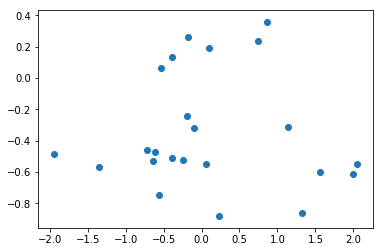

In [30]:
plt.scatter(y_test,predictions)

In [22]:
writer = pd.ExcelWriter('LinearRegScaled',engine='xlsxwriter')

In [24]:
dataset.to_excel(writer,sheet_name='Sheet 1')

In [26]:
writer.save()